## 3 Linear regression

### 3.1.2 Assessing the accuaracy of the CoefficientsEstimates

Let's validate with an example the residual standard error.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
np.random.seed(42) # for reproducibility

First generate one thousand data points, this will represent the population.
Data is generated with random gaussian noise.
Real linear function is given by y = 7.6X -3.3

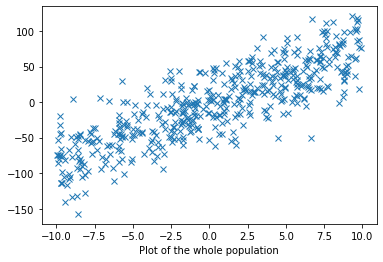

In [66]:
n = 500 # 500 datum points
X = np.random.uniform(-10,10, n) 
noise = np.random.normal(0, 30, n) # Gaussian distribution

#This are the real parameters
true_w, true_b = 7.6, -3.3

#Our true function
# y = w * x + b + ε
y = true_w * X + true_b + noise

pop = np.array([X, y])

plt.plot(X, y, 'x');
plt.xlabel('Plot of the whole population')
plt.show()

To compute the standard error assosiated to the coefitients $\beta_0$ and $\beta_1$ we have the following formulas:

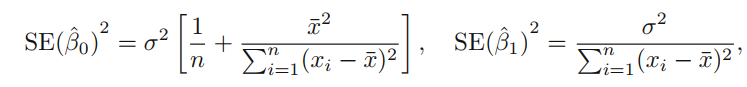

Where $\sigma^2$ = Var($\epsilon$). However, in a normal problem we don't have acces to $\epsilon$, so we have to calculate using the residual error using the next formlas:

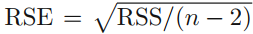 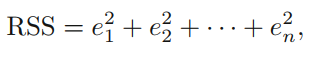 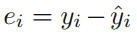

Let's use our generated data, then take N samples K times and check if our RSE estmiate is near to Var($\epsilon$)

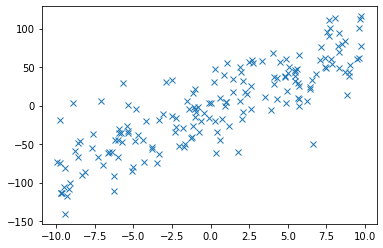

In [80]:
#divide train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65,test_size=0.35)

sample_number = 325

plt.plot(X_test, y_test, 'x');

In [81]:
#use scikit learn to calculate the coefficients
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

beta0 = linr.intercept_
beta1 = linr.coef_[0]

print(beta0, beta1)

[-4.46947958] [7.85773678]


Original coefficients are w = 7.3  and b = -3.3. Now lets calculate RSE using above formula. Remember our sample number n is (500 * 0.65) = 325

In [82]:
#Evaluate train data with calculated coeficients.
yHat = X_train * beta1 + beta0

#Calculate error
error = y_train - yHat

#Calculate RSS
rss = np.square(error)
rss = np.sum(rss)
rss

270163.46853590873

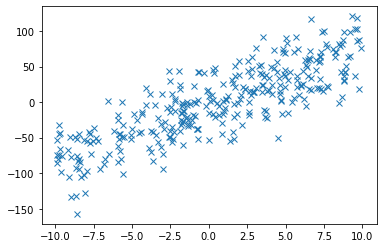

In [83]:
plt.plot(X_train, y_train, 'x');

In [84]:
#Now calculate RSE
rse = math.sqrt(rss / (sample_number-2))
rse

28.92091643139815

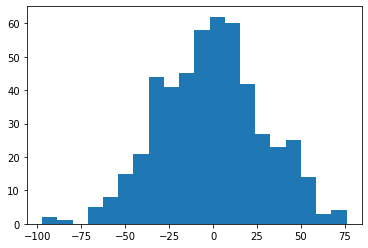

In [85]:
plt.hist(noise, bins=20)
plt.show()

In [86]:
np.std(noise)

29.050273900403948

In [87]:
#Calculate standard error for beta_1
X_train_median = np.median(X_train)
x_sq_sum = X_train - X_train_median
x_sq_sum = np.square(x_sq_sum)
x_sq_sum = np.sum(x_sq_sum)
beta1_SE = rse / x_sq_sum
beta1_SE

0.002947779947353501

In [89]:
#Calculate standard error for beta_0
beta0_SE = X_train_median ** 2 / x_sq_sum
beta0_SE = rse * ((1/sample_number) + beta0_SE)
beta0_SE

0.09103251546569939